# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [6]:
import pandas as pd
import mysql.connector
import os

import pylab as pl

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv', 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:\data files\Ecommerce_sales'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)

    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


<>:26: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:26: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\arunk\AppData\Local\Temp\ipykernel_17012\2452302364.py:26: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  folder_path = 'D:\data files\Ecommerce_sales'


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db=mysql.connector.connect(host="localhost",username="root",password="Sumitkr2004@",database="ecommerce")

cur=db.cursor()


In [3]:
# 1. List all unique cities where customers are located.

query= """ select distinct customer_city from customers """
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [6]:
# 2. Count the number of orders placed in 2017.

query= """ select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data[0][0]

45101

In [10]:
# 3. Find the total sales per category.

query=""" select products.product_category category,round(sum(payments.payment_value),2)     sales
      from products join order_items
      on products.product_id=order_items.product_id
      join payments
      on payments.order_id=order_items.order_id
      group by category """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Category','Sales'])
df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


In [12]:
# 4. Calculate the percentage of orders that were paid in installments.

query="""select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

In [17]:
# 5. Count the number of customers from each state.

query=""" select customer_state,count(customer_id) from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["State","Count"])
df

,State,Count
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


In [12]:
# 6. Calculate the number of orders per month in 2018.

query="""
 select month(order_purchase_timestamp) months,
 count(order_id) order_count from orders
 where year(order_purchase_timestamp)=2018
 group by months
      """

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","order_count"])
df
# o=["January","February","March","April","May","June","July","August","September","October","November","December"]
# sns.barplot(x=df["months"],y=df["order_count"],data=df,order=o)
# plt.xticks(rotation=90)
# plt.show()

,months,order_count
0,7,6292
1,8,6512
2,2,6728
3,6,6167
4,3,7211
5,1,7269
6,5,6873
7,4,6939
8,9,16
9,10,4


In [6]:
# 7. Find the average number of products per order, grouped by customer city.

query="""
 with count_per_order as
(select orders.order_id,orders.customer_id,
count(order_items.order_id) as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id, orders.customer_id)
      select customers.customer_city,round(avg(count_per_order.oc),2) average_orders
      from customers join count_per_order
      on customers.customer_id=count_per_order.customer_id
      group by customers.customer_city order by average_orders desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customer_city","order_count"])
df.head(10)



,customer_city,order_count
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


In [6]:
# 8. Calculate the percentage of total revenue contributed by each product category.

query="""
      select products.product_category category,
      round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales
      from products join order_items
      on products.product_id=order_items.product_id
      join payments
      on payments.order_id=order_items.order_id
      group by category order by sales desc
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Percentage"])
df

,Category,Percentage
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
...,...,...
69,House Comfort 2,0.01
70,cds music dvds,0.01
71,PC Gamer,0.01
72,Fashion Children's Clothing,0.00


In [21]:
# 9. Identify the correlation between product price and the number of times a product has been purchased.

query="""
 select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category
    """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","Product Count","Price"])

arr1=df["Product Count"]
arr2=df["Price"]
a=np.corrcoef([arr1,arr2])
print("the correlation is",a[0][-1])

the correlation is -0.10631514167157562


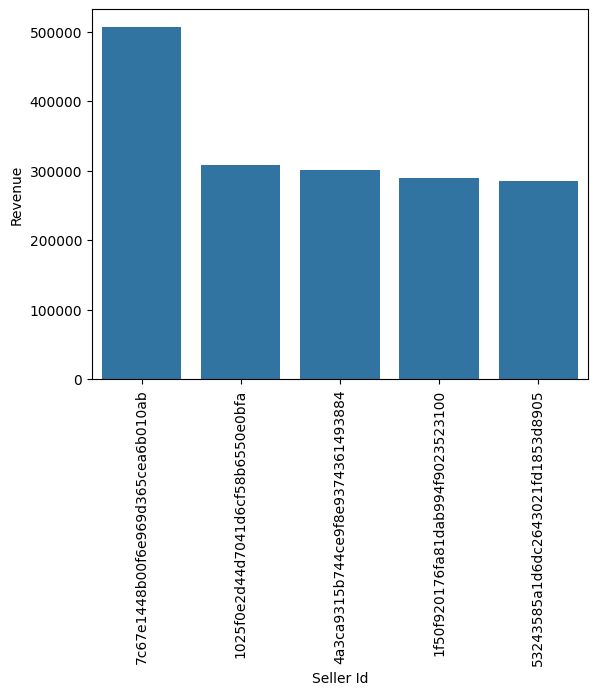

In [34]:
# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

query = """ select *,dense_rank() over(order by revenue desc) as rn from
        (select order_items.seller_id,sum(payments.payment_value)
         revenue from order_items join payments
        on order_items.order_id=payments.order_id
         group by order_items.seller_id) as a
        """
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data,columns=["Seller Id","Revenue","Rank"])
df=df.head(5)
sns.barplot(x="Seller Id",y="Revenue",data=df)
plt.xticks(rotation=90)
plt.show()


In [12]:
# 11. Calculate the moving average of order values for each customer over their order history.

query = """select customer_id,order_purchase_timestamp,payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


In [22]:
# 12. Calculate the cumulative sales per month for each year.

query="""
select years,months,sum(payment)
over(order by years,months)
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
      on orders.order_id=payments.order_id
      group by years,months order by years,months) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","month","payment"])
df

,years,month,payment
0,2016,9,252.24
1,2016,10,59342.72
2,2016,12,59362.34
3,2017,1,197850.38
4,2017,2,489758.39
5,2017,3,939621.99
6,2017,4,1357410.02
7,2017,5,1950328.84
8,2017,6,2461605.22
9,2017,7,3053988.14


In [24]:
# 13. Calculate the year-over-year growth rate of total sales.

query="""select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id=payments.order_id
group by years order by years"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1
0,2016,59362.34
1,2017,7249746.73
2,2018,8699763.05
